<a href="https://colab.research.google.com/github/2002hk/Swiggy-delivery-time-prediction/blob/main/swiggy_Food_delivery_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import data_clean_utils
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px

In [3]:
# load the data
df=pd.read_csv('/content/cleaned_data.csv')
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138


In [4]:
df.shape

(45502, 26)

In [5]:
df.isna().sum()

,0
rider_id,0
age,1854
ratings,1908
restaurant_latitude,3630
restaurant_longitude,3630
delivery_latitude,3630
delivery_longitude,3630
order_date,0
weather,525
traffic,510


In [11]:
missing_rows=df.isna().any(axis=1).sum()
print(missing_rows)

7438


In [9]:
print('The number of rows with null values are 7438')

The number of rows with null values are 7438


In [13]:
percentage_of_missing_rows=missing_rows/df.shape[0]
print(percentage_of_missing_rows*100)

16.34653421827612


16% data is missing in this dataset

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.dtypes

,0
rider_id,object
age,float64
ratings,float64
restaurant_latitude,float64
restaurant_longitude,float64
delivery_latitude,float64
delivery_longitude,float64
order_date,object
weather,object
traffic,object


In [17]:
# numerical and categorical columns

num_cols = df.columns[[1,2,3,4,5,6,16,22,25]].tolist()
cat_cols=[col for col in df.columns.tolist() if col not in num_cols]
print(f"The number of Numerical Columns {len(num_cols)} and the the number of categorical columns {len(cat_cols)}")

The number of Numerical Columns 9 and the the number of categorical columns 17


In [18]:
num_cols

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'time_taken',
 'pickup_time_minutes',
 'distance']

In [19]:
cat_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_day',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_hour',
 'order_time_of_day']

In [20]:
# statistical summary of numerical columns
df[num_cols].describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,time_taken,pickup_time_minutes,distance
count,43648.000000,43594.000000,41872.000000,41872.000000,41872.000000,41872.000000,45502.000000,43862.000000,41872.000000
mean,29.555008,4.635287,18.913696,76.921664,18.977356,76.985325,26.297591,9.989399,9.719296
std,5.761482,0.313827,5.467265,3.503107,5.469056,3.503260,9.386419,4.087516,5.602890
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,10.000000,5.000000,1.465067
25%,25.000000,4.500000,12.986047,73.897902,13.065996,73.940327,19.000000,5.000000,4.657655
50%,30.000000,4.700000,19.065838,76.618203,19.124049,76.662620,26.000000,10.000000,9.193014
75%,35.000000,4.900000,22.751234,78.368855,22.820040,78.405467,32.000000,15.000000,13.680920
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,54.000000,15.000000,20.969489


In [22]:
# statistical summary of categorical columns

(
    df
    .assign(**{
        col: df[col].astype("object")
        for col in cat_cols
    })
    .describe(include="object")
    .T
)

,count,unique,top,freq
rider_id,45502,1320,PUNERES01DEL01,67
order_date,45502,44,2022-03-15,1190
weather,44977,6,fog,7654
traffic,44992,4,low,15477
vehicle_condition,45502,4,2,15034
type_of_order,45502,4,snack,11512
type_of_vehicle,45502,4,motorcycle,26427
multiple_deliveries,44509.0,4.0,1.0,28109.0
festival,45274,2,no,44380
city_type,44304,3,metropolitian,34029


In [23]:
import missingno as msno

<Axes: >

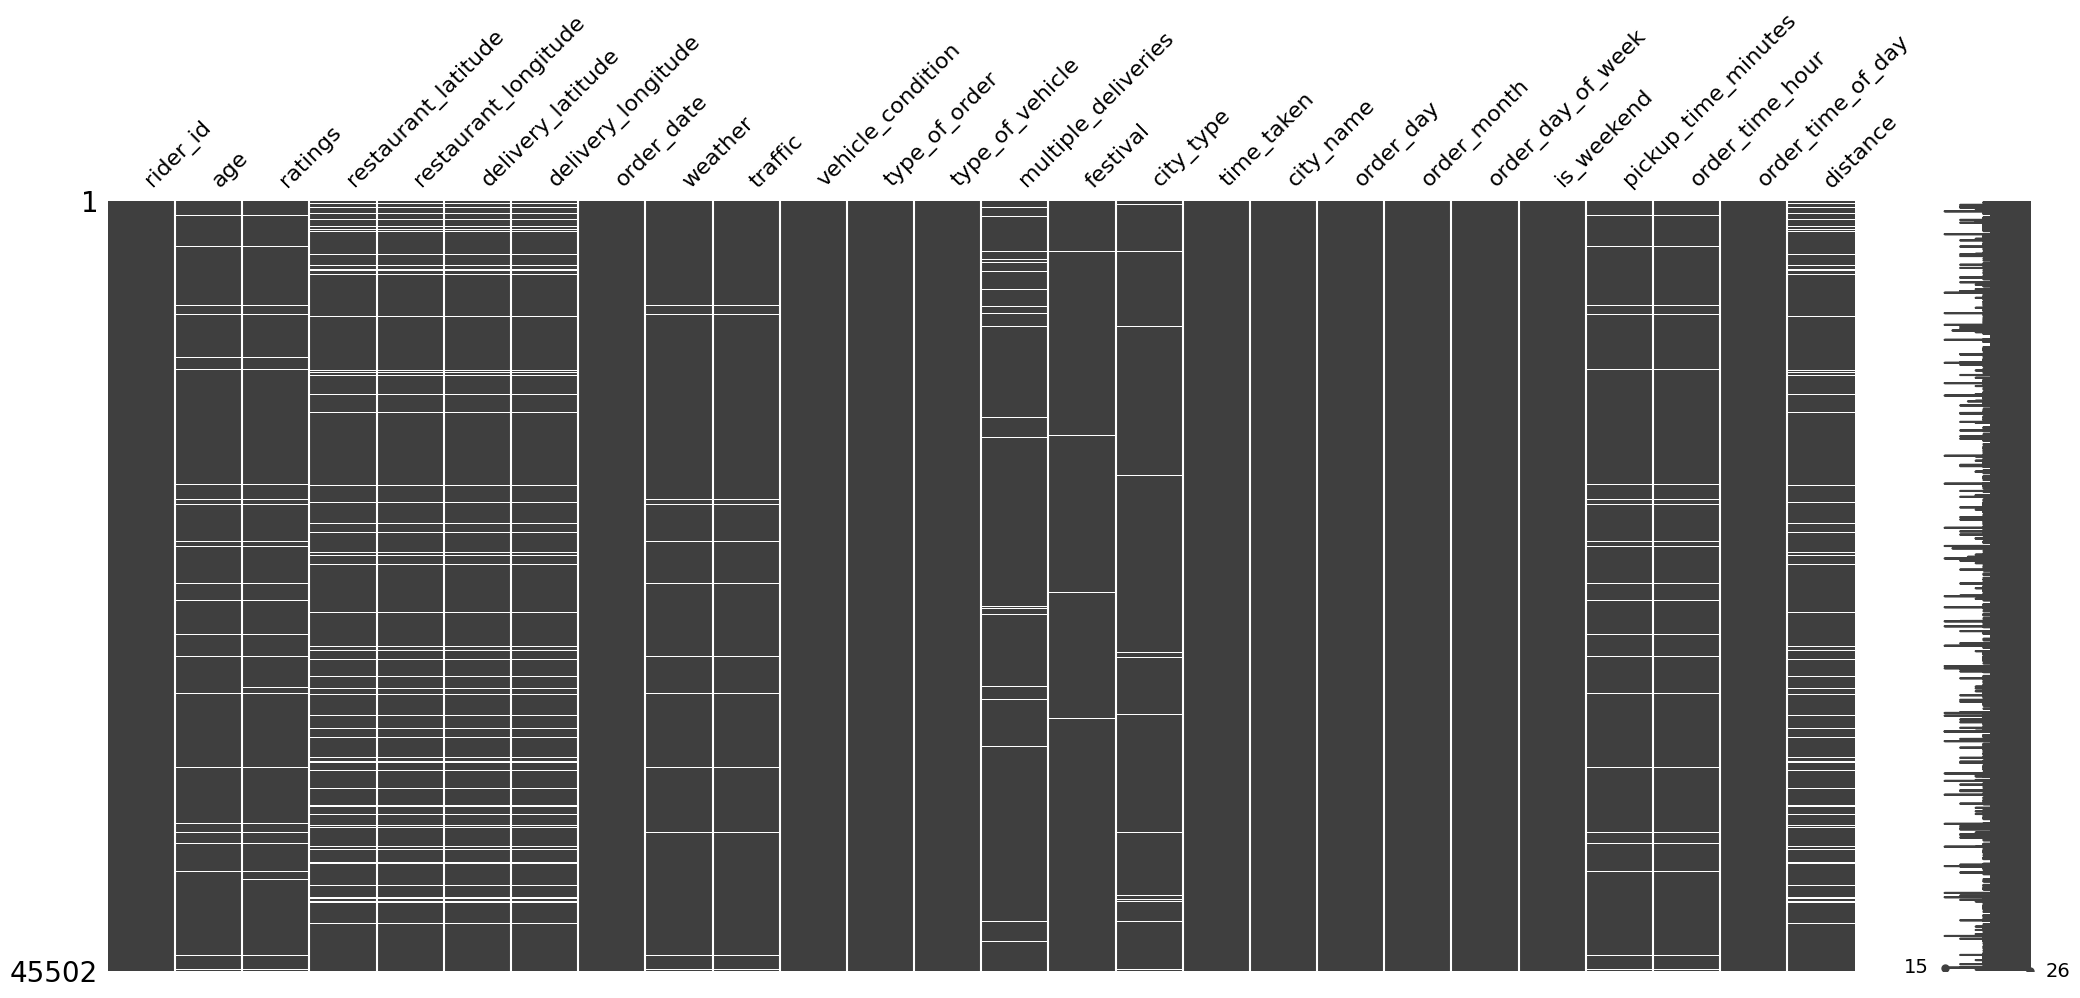

In [24]:
msno.matrix(df)

<Axes: >

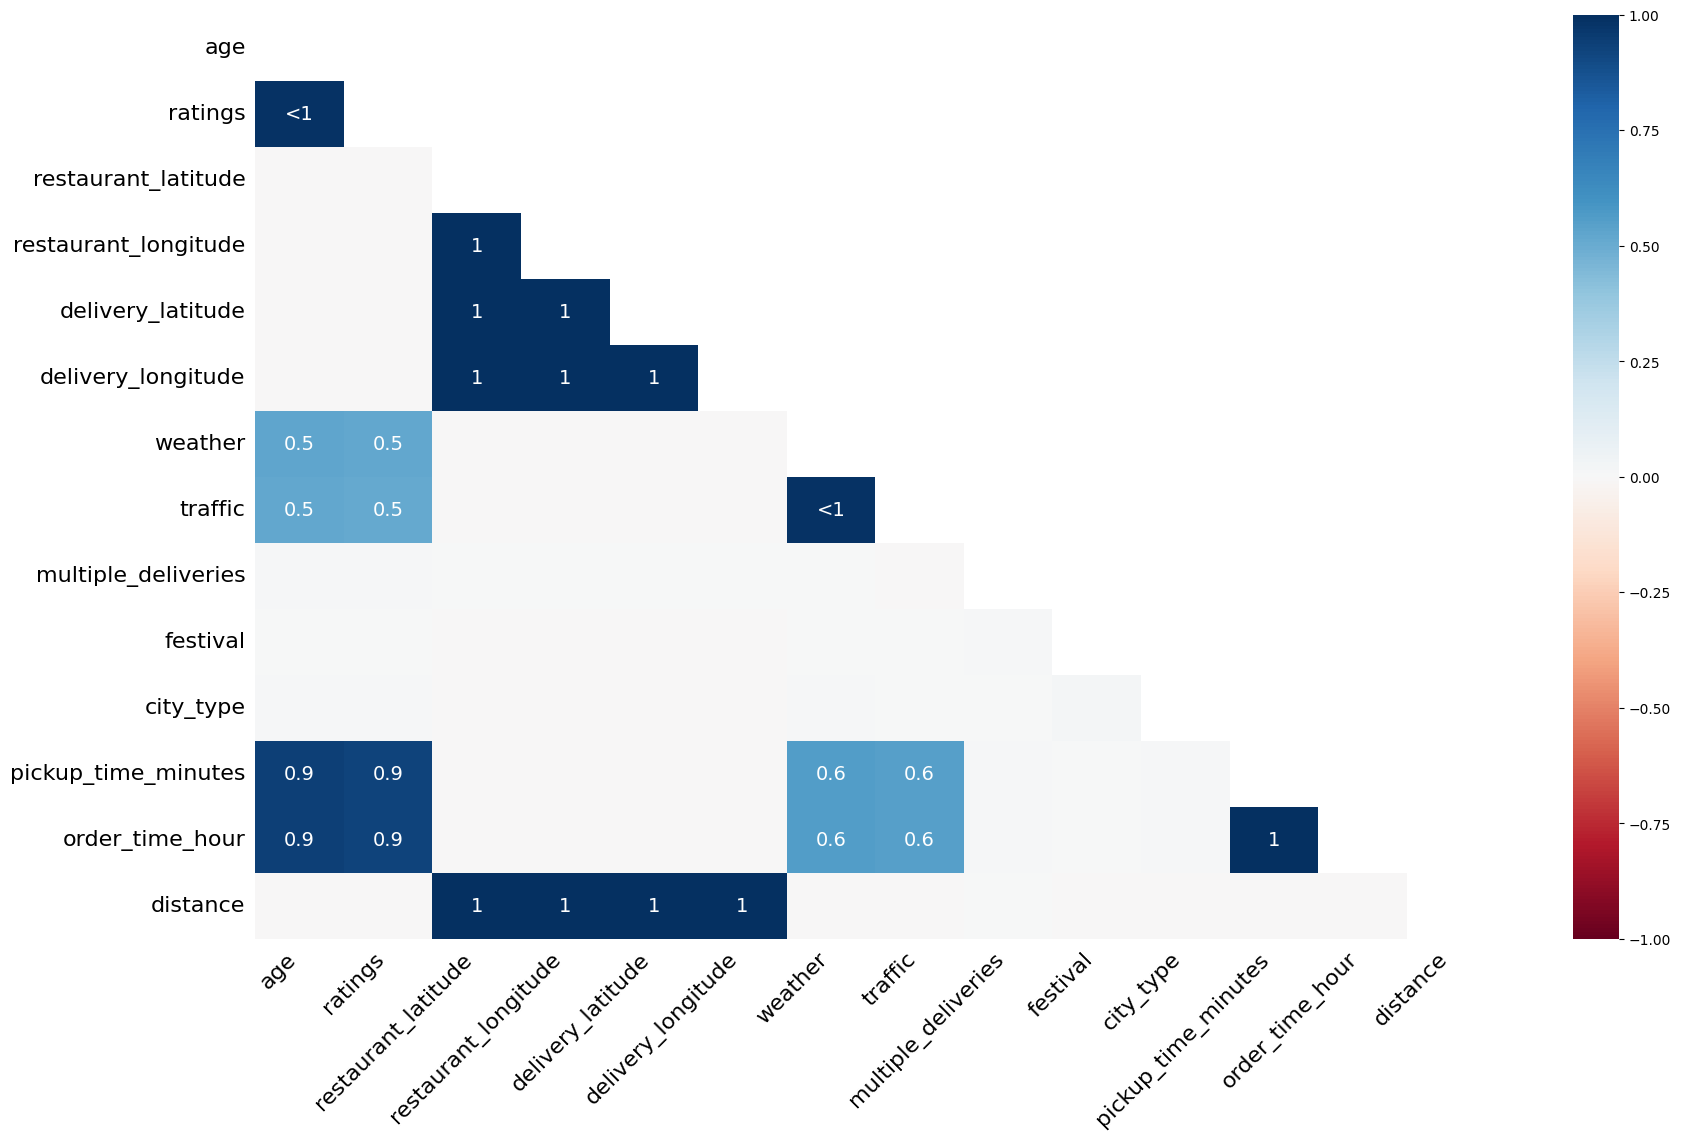

In [25]:
msno.heatmap(df)

## Functions to Perform Analysis

In [26]:
def numerical_analysis(dataframe, column_name, cat_col=None, bins="auto"):
    # create the figure
    fig = plt.figure(figsize=(15,10))
    # generate the layout
    grid = GridSpec(nrows=2, ncols=2, figure=fig)
    # set subplots
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])
    ax3 = fig.add_subplot(grid[1, :])
    # plot the kdeplot
    sns.kdeplot(data=dataframe, x=column_name,hue=cat_col, ax=ax1)
    # plot the boxplot
    sns.boxplot(data=dataframe, x=column_name,hue=cat_col, ax=ax2)
    # plot the histogram
    sns.histplot(data=dataframe, x=column_name,bins=bins,hue=cat_col,kde=True, ax=ax3)
    plt.tight_layout()
    plt.show()


def numerical_categorical_analysis(dataframe, cat_column_1, num_column):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[1])
    plt.tight_layout()
    plt.show()


def categorical_analysis(dataframe, column_name):
    # print the values counts of categories
    display(
        pd.DataFrame({
            "Count": (
                dataframe[column_name]
                .value_counts()),
            "Percentage": (
                dataframe[column_name]
                .value_counts(normalize=True)
                .mul(100)
                .round(2)
                .astype("str")
                .add("%")
                )
        })
    )
    print("*" * 50)
    # get unique categories
    unique_categories = dataframe[column_name].unique().tolist()
    number_of_categories = dataframe[column_name].nunique()
    print(f"The unique categories in {column_name} column are {unique_categories}")
    print("*" * 50)
    print(f"The number of categories in {column_name} column are {number_of_categories}")
    # plot countplot
    sns.countplot(data=dataframe, x=column_name)
    plt.xticks(rotation=45)
    plt.show()


def multivariate_analysis(dataframe, num_column, cat_column_1, cat_column_2):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, gap=0.1, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, gap=0.1,
                   y=num_column,hue=cat_column_2, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1,
                  y=num_column,hue=cat_column_2,dodge=True,ax=ax2[1])
    plt.tight_layout()
    plt.show()

def chi_2_test(dataframe, col1, col2, alpha= 0.05):
    data = (
        dataframe.loc[:, [col1, col2]]
        .dropna()
    )
    # create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    # perform chi-squared test
    _, p_val, _, _ = chi2_contingency(contingency_table)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant association between {col1} and {col2}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant association between {col1} and {col2}.")

def anova_test(dataframe, num_col, cat_col, alpha=0.05):
    data = (
        dataframe.loc[:, [num_col, cat_col]]
        .dropna()
    )
    cat_group = data.groupby(cat_col)
    groups = [group[num_col].values for _, group in cat_group]
    f_stat, p_val = f_oneway(*groups)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant relationship between {num_col} and {cat_col}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant relationship between {num_col} and {cat_col}.")

def test_for_normality(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    print("Jarque Bera Test for Normality")
    _, p_val = jarque_bera(data)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. The data is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data is normally distributed.",end="\n\n")


## Columns wise analysis
## Time Taken

In [28]:
# data type of column

df['time_taken'].dtype

dtype('int64')

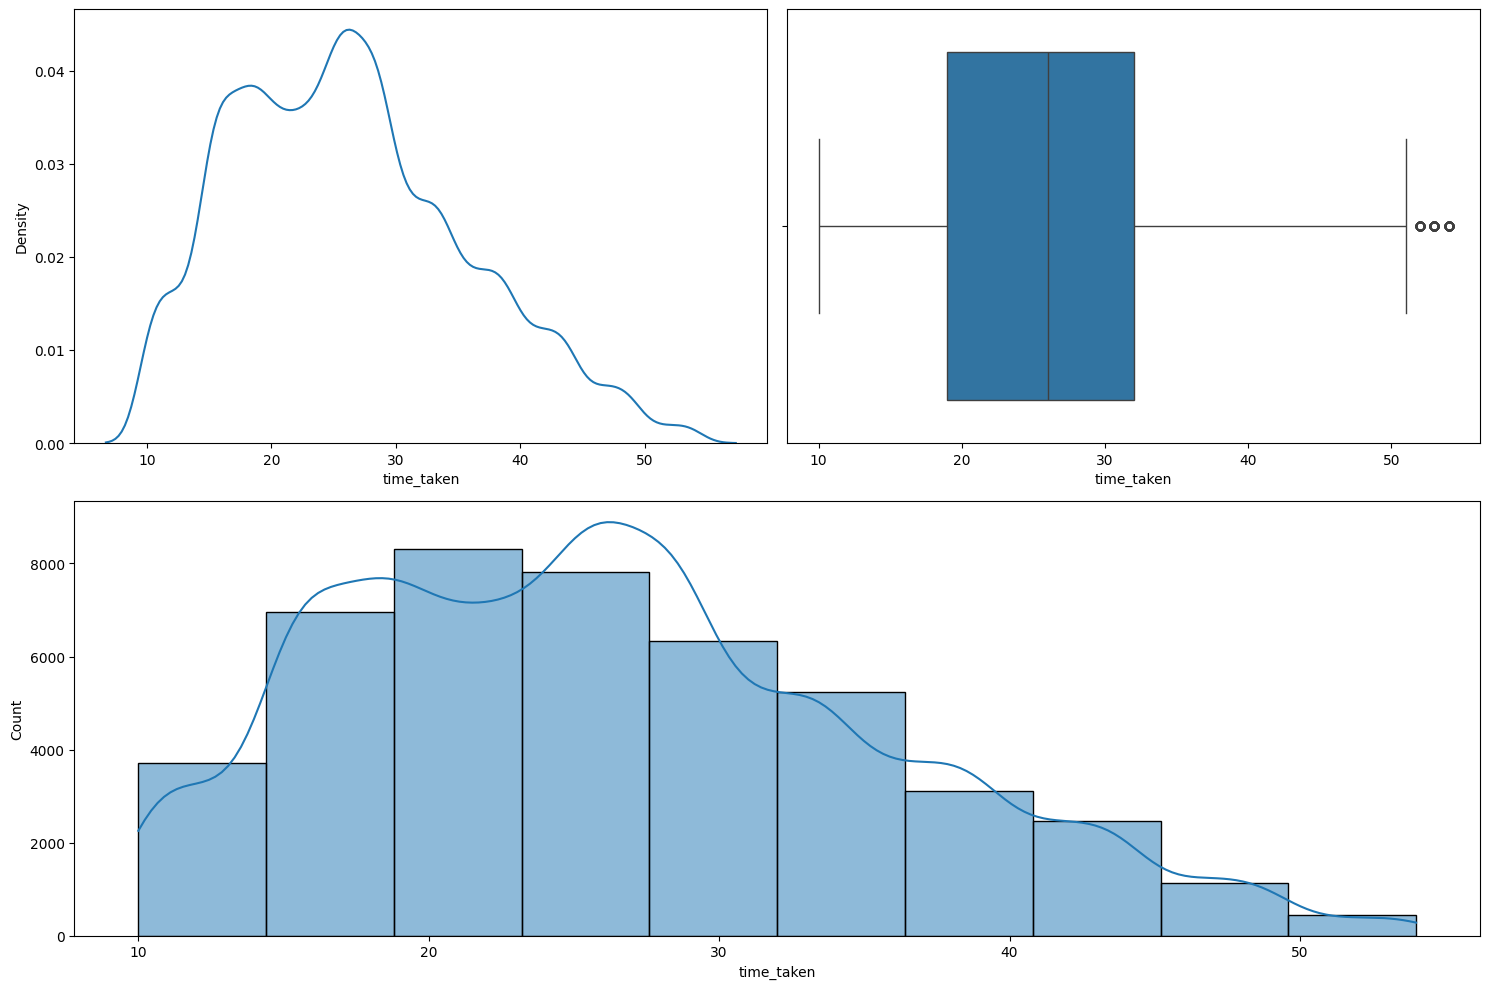

In [30]:
# numerical analysis

numerical_analysis(df, 'time_taken',bins=10)

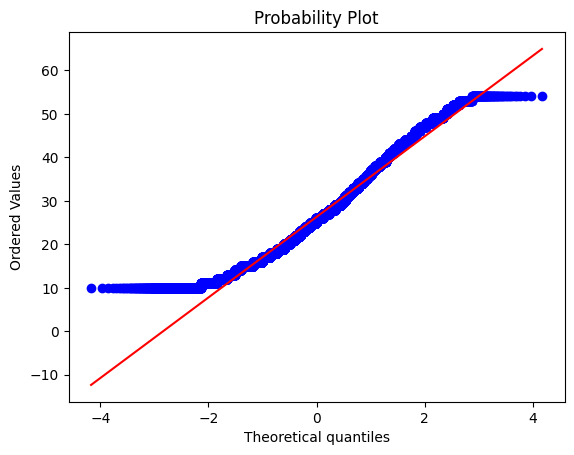

In [32]:
# plot QQ plot for the target

probplot(df['time_taken'], plot=plt)
plt.show()

In [33]:
# tests for normailty

test_for_normality(df, 'time_taken')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


In [34]:
# check out the rows where data is acting as outlier

target_25_per, target_75_per = np.percentile(df['time_taken'], [25, 75])
iqr = target_75_per - target_25_per

upper_bound = target_75_per + (1.5 * iqr)

df.loc[(df['time_taken'] > upper_bound),"traffic"].value_counts()

,count
traffic,
jam,241
high,24


In [35]:
df.loc[(df['time_taken'] > upper_bound),"weather"].value_counts()

,count
weather,
fog,57
sunny,51
windy,44
cloudy,44
stormy,37
sandstorms,32


In [36]:
# average distances
avg_distance = df.loc[:,"distance"].mean()
avg_distance_extreme = df.loc[(df['time_taken'] > upper_bound),"distance"].mean()

print(avg_distance, avg_distance_extreme)

9.719296323199579 13.29215081388658


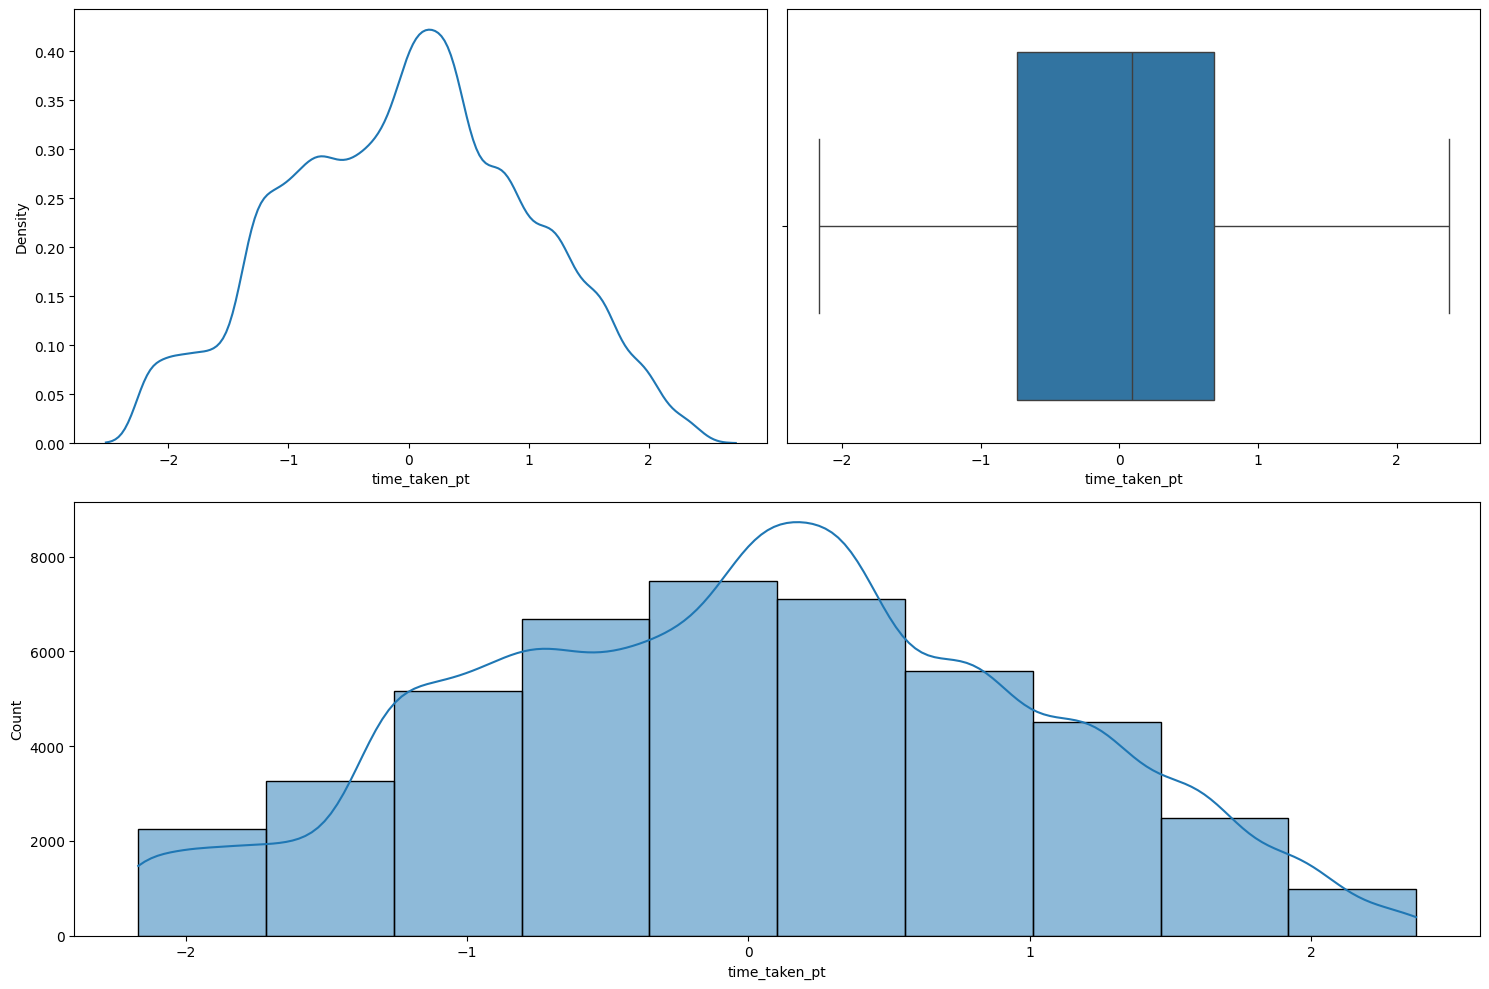

In [37]:
# fix traget column using transformation

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

df['time_taken_pt'] = pt.fit_transform(df[['time_taken']])

numerical_analysis(df, "time_taken_pt", bins=10)

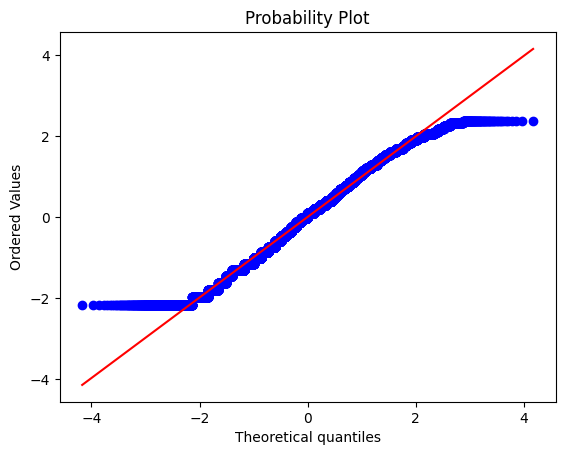

In [38]:
# plot QQ plot for the target after transformation

probplot(df['time_taken_pt'], plot=plt)
plt.show()

## Rider ID

In [39]:
df[["rider_id","age","ratings"]]

,rider_id,age,ratings
0,INDORES13DEL02,37.0,4.9
1,BANGRES18DEL02,34.0,4.5
2,BANGRES19DEL01,23.0,4.4
3,COIMBRES13DEL02,38.0,4.7
4,CHENRES12DEL01,32.0,4.6
...,...,...,...
45497,JAPRES04DEL01,30.0,4.8
45498,AGRRES16DEL01,21.0,4.6
45499,CHENRES08DEL03,30.0,4.9
45500,COIMBRES11DEL01,20.0,4.7


In [40]:
# sample of data

rider_id_group = df[["rider_id","age","ratings"]].groupby('rider_id')
rider_id_group.head(5).sort_values('rider_id')

,rider_id,age,ratings
92,AGRRES010DEL01,34.0,4.7
7738,AGRRES010DEL01,21.0,4.7
4554,AGRRES010DEL01,38.0,4.7
12416,AGRRES010DEL01,34.0,4.5
13223,AGRRES010DEL01,39.0,4.4
...,...,...,...
861,VADRES20DEL03,35.0,4.8
9792,VADRES20DEL03,30.0,4.6
9753,VADRES20DEL03,38.0,4.8
5094,VADRES20DEL03,35.0,4.9


In [41]:
# check for duplicates

df[["rider_id","age","ratings"]].dropna().duplicated(keep=False).sum()

np.int64(10155)

In [42]:
# filter the duplicates

(
    df
    .loc[(df[["rider_id","age","ratings"]].duplicated(keep=False)),["rider_id","age","ratings"]]
    .dropna()
    .sort_values(["rider_id"])
)

,rider_id,age,ratings
18533,AGRRES03DEL02,24.0,4.9
40285,AGRRES03DEL02,24.0,4.9
28473,AGRRES03DEL03,30.0,4.7
26275,AGRRES03DEL03,30.0,4.7
36131,AGRRES06DEL02,36.0,4.9
...,...,...,...
12742,VADRES20DEL02,28.0,4.5
5094,VADRES20DEL03,35.0,4.9
17963,VADRES20DEL03,35.0,4.9
21957,VADRES20DEL03,37.0,4.9


Not useful for analysis

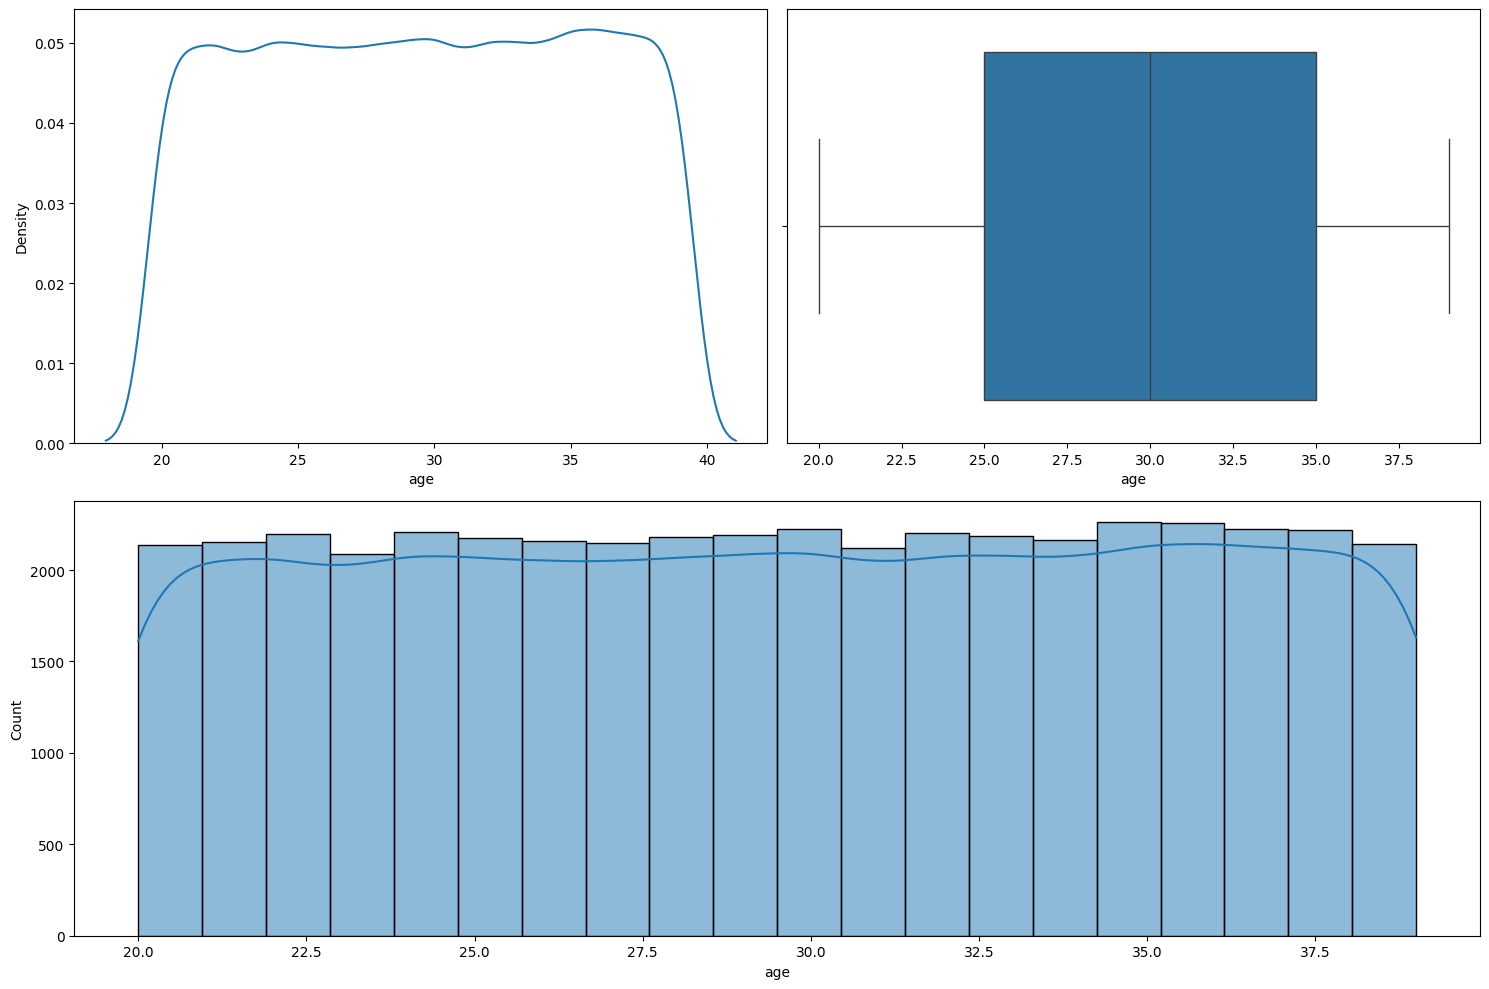

In [43]:
numerical_analysis(df,'age',bins=20)

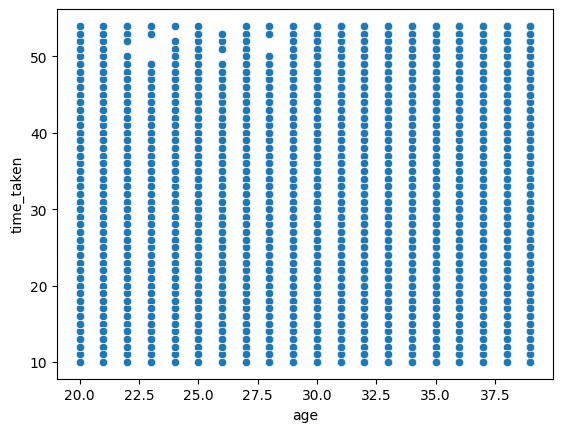

In [44]:
# relationship between target and age
sns.scatterplot(data=df,x='age',y='time_taken')
plt.show()

Age of rider does not have impact on the time taken


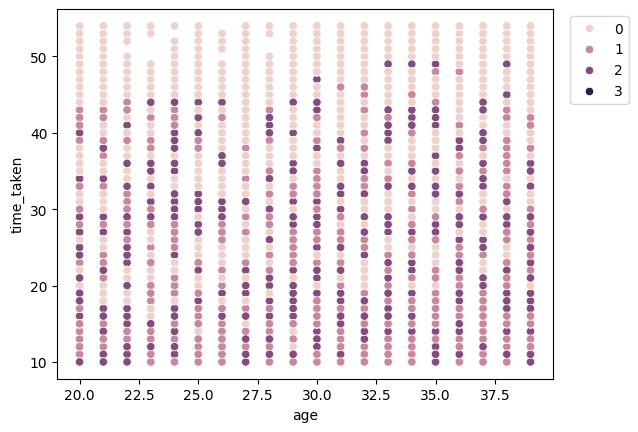

In [46]:
sns.scatterplot(data=df,x='age',y='time_taken',hue='vehicle_condition')
plt.legend(bbox_to_anchor=(1.02,1),loc=2)
plt.show()

<Axes: xlabel='type_of_vehicle', ylabel='age'>

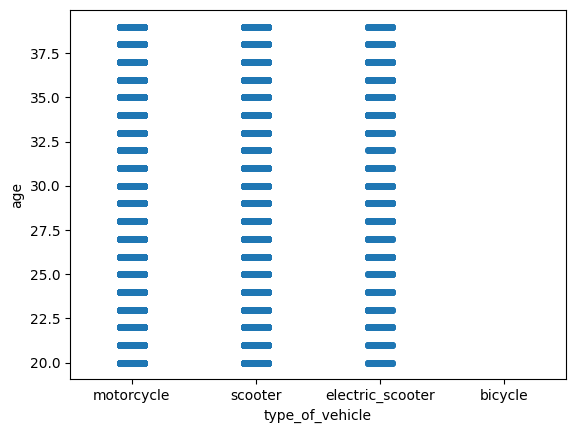

In [47]:
#preference of vehicle type based on age
sns.stripplot(df,x='type_of_vehicle',y='age')


## Ratings


In [48]:
df['ratings'].describe()

,ratings
count,43594.000000
mean,4.635287
std,0.313827
min,2.500000
25%,4.500000
50%,4.700000
75%,4.900000
max,5.000000


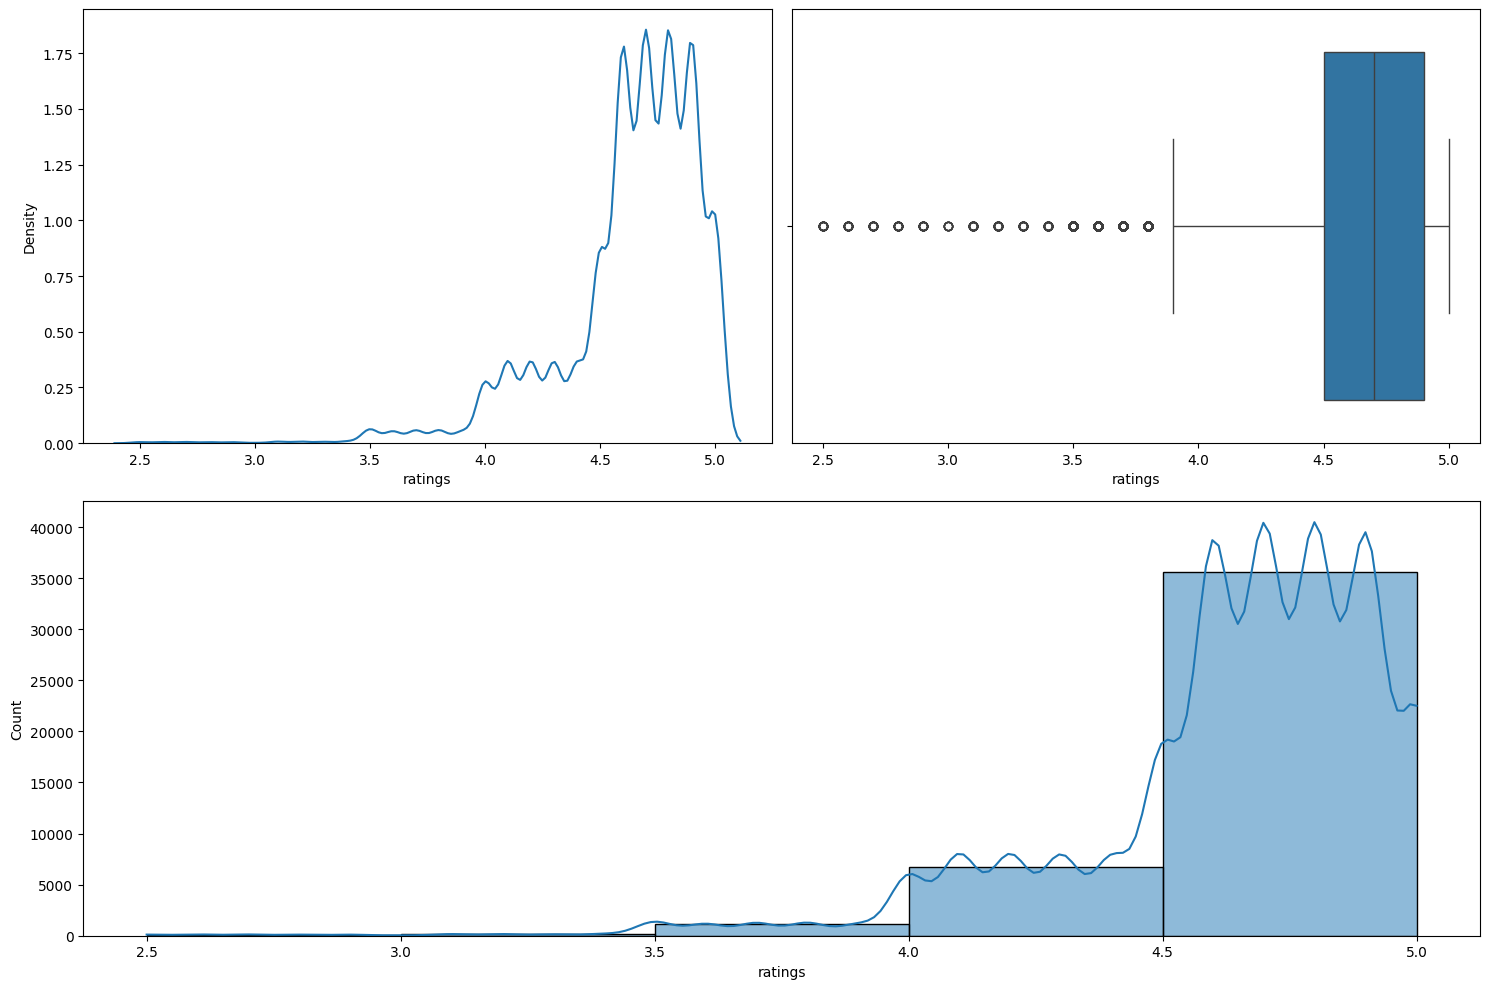

In [49]:
#numerical analysis
numerical_analysis(df,'ratings',bins=5)

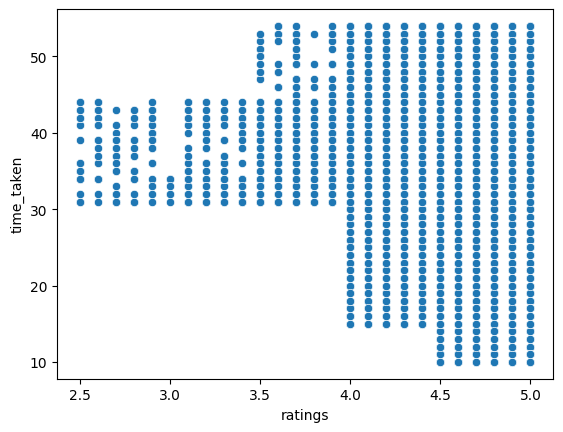

In [50]:
# does rating affect delivery time
sns.scatterplot(data=df,x='ratings',y='time_taken')
plt.show()

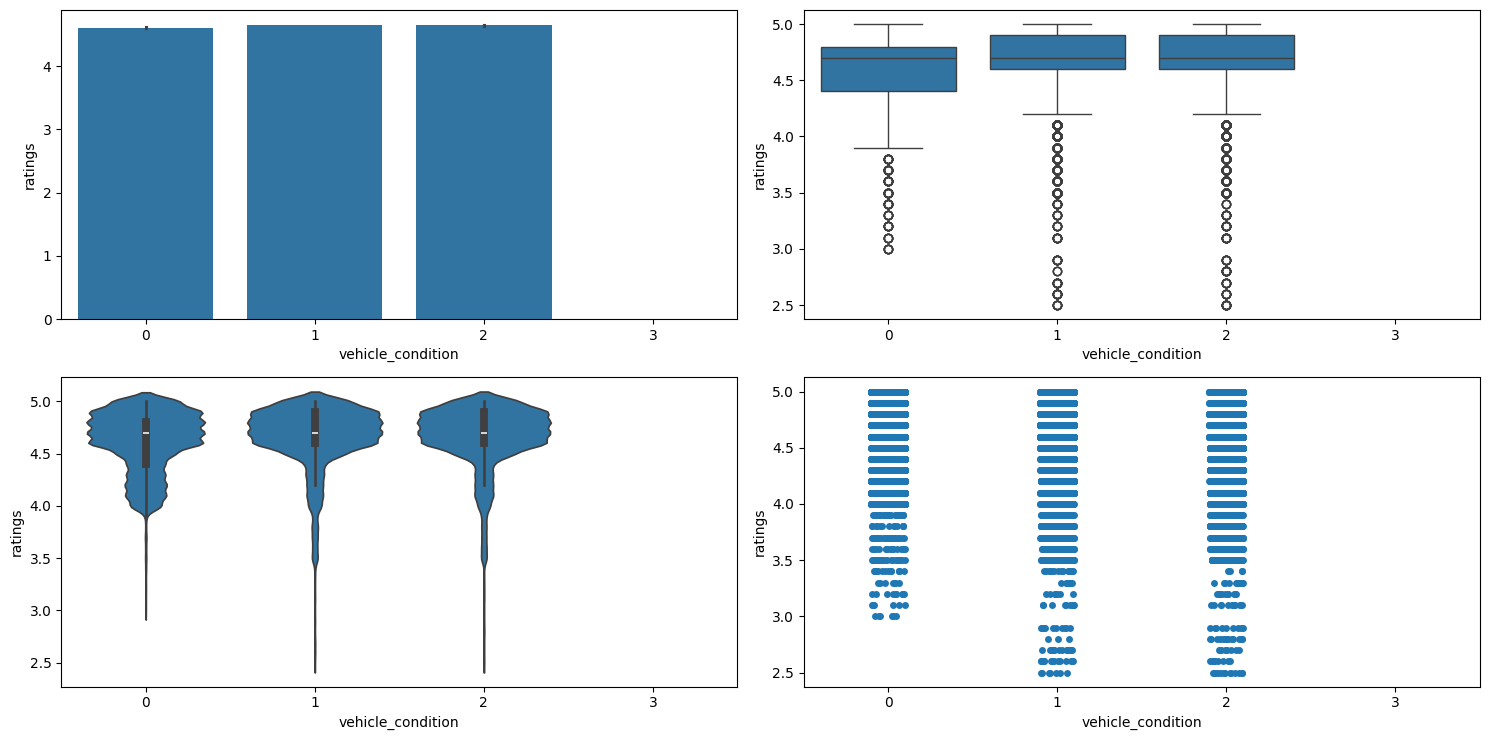

In [51]:
# does ratings get affected by vehicle type

numerical_categorical_analysis(df, 'vehicle_condition', 'ratings')

In [53]:
(
    df[["ratings","vehicle_condition"]]
    .loc[df["vehicle_condition"]==3,"ratings"]
    .value_counts(dropna=False)
)

,count
ratings,
NaN,429


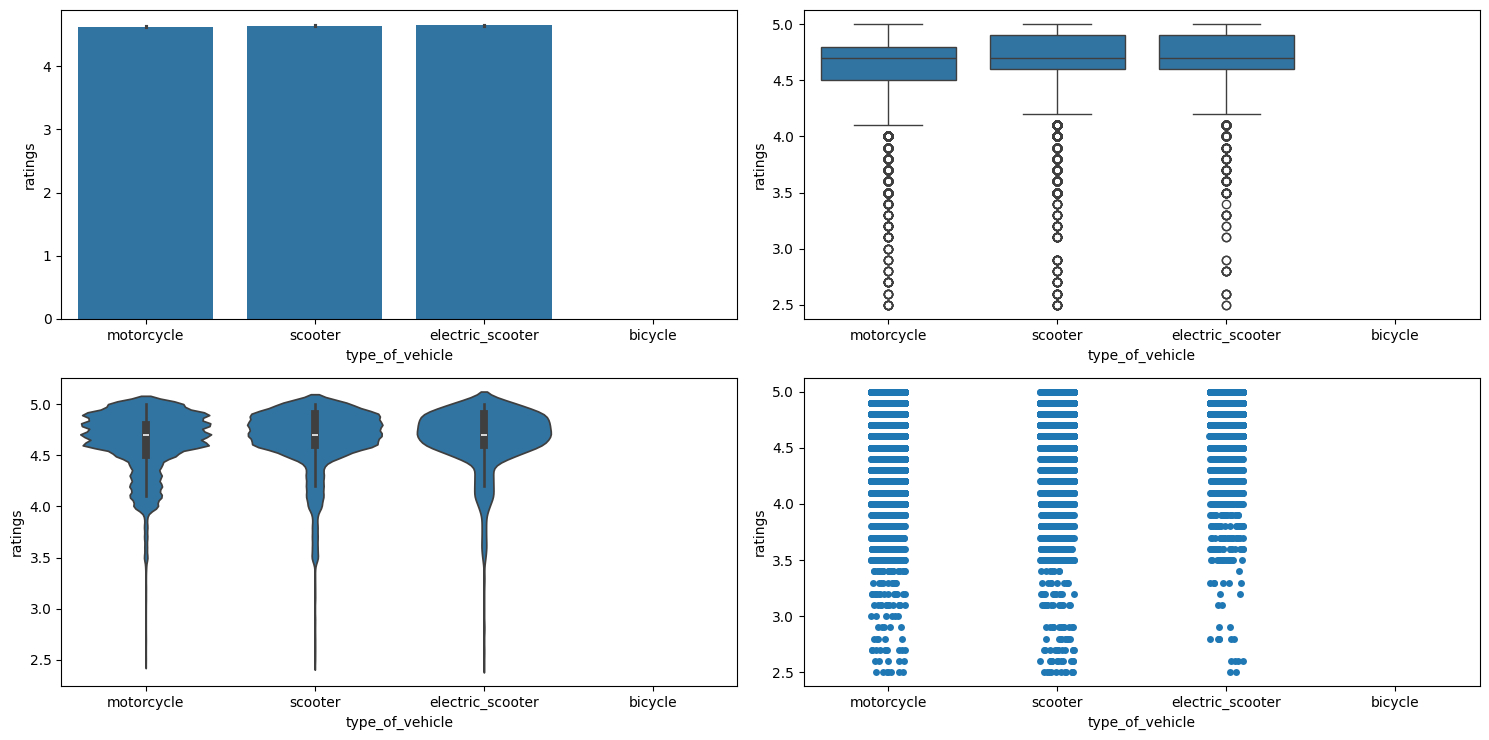

In [54]:
# does type of vehicle affects ratings

numerical_categorical_analysis(df, 'type_of_vehicle', 'ratings')

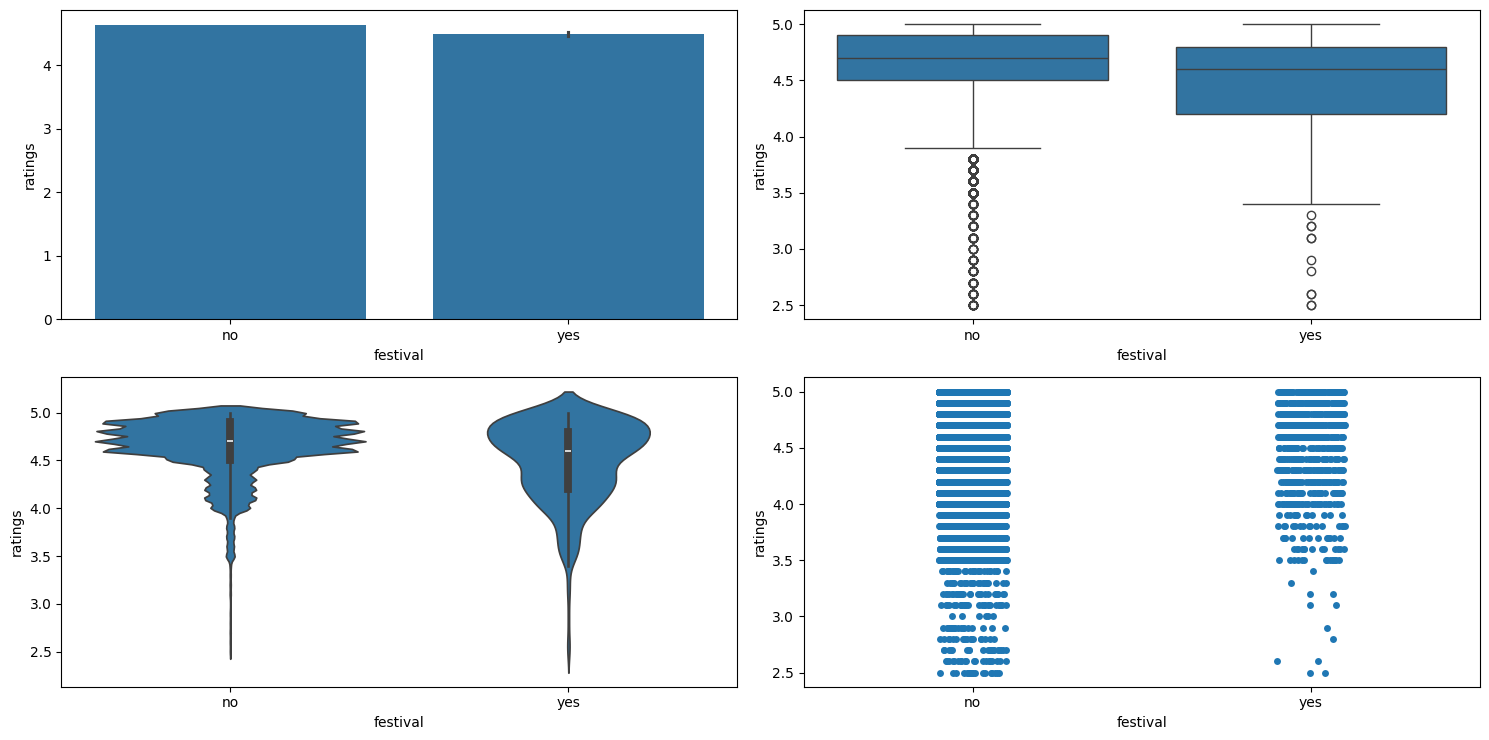

In [55]:
# festvals and rider ratings

numerical_categorical_analysis(df, 'festival', 'ratings')

## Location Based Features



In [56]:
## drop missing values
# location subset

location_subset = df.loc[:,df.columns[3:7].tolist() + ["city_name"]]

location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,city_name
0,22.745049,75.892471,22.765049,75.912471,INDO
1,12.913041,77.683237,13.043041,77.813237,BANG
2,12.914264,77.678400,12.924264,77.688400,BANG
3,11.003669,76.976494,11.053669,77.026494,COIMB
4,12.972793,80.249982,13.012793,80.289982,CHEN
...,...,...,...,...,...
45497,26.902328,75.794257,26.912328,75.804257,JAP
45498,NaN,NaN,NaN,NaN,AGR
45499,13.022394,80.242439,13.052394,80.272439,CHEN
45500,11.001753,76.986241,11.041753,77.026241,COIMB


In [57]:
# drop missing values

location_subset.dropna(inplace=True)

location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,city_name
0,22.745049,75.892471,22.765049,75.912471,INDO
1,12.913041,77.683237,13.043041,77.813237,BANG
2,12.914264,77.678400,12.924264,77.688400,BANG
3,11.003669,76.976494,11.053669,77.026494,COIMB
4,12.972793,80.249982,13.012793,80.289982,CHEN
...,...,...,...,...,...
45496,23.371292,85.327872,23.481292,85.437872,RANCHI
45497,26.902328,75.794257,26.912328,75.804257,JAP
45499,13.022394,80.242439,13.052394,80.272439,CHEN
45500,11.001753,76.986241,11.041753,77.026241,COIMB


In [58]:
delivery_df = pd.DataFrame({
    'latitude': location_subset['delivery_latitude'],
    'longitude': location_subset['delivery_longitude'],
    "city_name": location_subset["city_name"]
})


# Create a map using Plotly's scatter_mapbox
fig = px.scatter_mapbox(
    delivery_df,
    lat='latitude',
    lon='longitude',
    title="Delivery Points",
    hover_name="city_name"
)

# Update the layout for the map of India
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 20.5937, "lon": 78.9629},  # Centered over India
    mapbox_zoom=3,
)

# Show the plot
fig.show()

## Order Date

In [59]:
df.filter(like="order")

,order_date,type_of_order,order_day,order_month,order_day_of_week,order_time_hour,order_time_of_day
0,2022-03-19,snack,19,3,saturday,11.0,morning
1,2022-03-25,snack,25,3,friday,19.0,evening
2,2022-03-19,drinks,19,3,saturday,8.0,morning
3,2022-04-05,buffet,5,4,tuesday,18.0,evening
4,2022-03-26,snack,26,3,saturday,13.0,afternoon
...,...,...,...,...,...,...,...
45497,2022-03-24,meal,24,3,thursday,11.0,morning
45498,2022-02-16,buffet,16,2,wednesday,19.0,evening
45499,2022-03-11,drinks,11,3,friday,23.0,night
45500,2022-03-07,snack,7,3,monday,13.0,afternoon


In [60]:
# order date columns

order_date_subset = df.loc[:,["order_date","order_day","order_month","order_day_of_week","is_weekend","festival"]]

order_date_subset

,order_date,order_day,order_month,order_day_of_week,is_weekend,festival
0,2022-03-19,19,3,saturday,1,no
1,2022-03-25,25,3,friday,0,no
2,2022-03-19,19,3,saturday,1,no
3,2022-04-05,5,4,tuesday,0,no
4,2022-03-26,26,3,saturday,1,no
...,...,...,...,...,...,...
45497,2022-03-24,24,3,thursday,0,no
45498,2022-02-16,16,2,wednesday,0,no
45499,2022-03-11,11,3,friday,0,no
45500,2022-03-07,7,3,monday,0,no


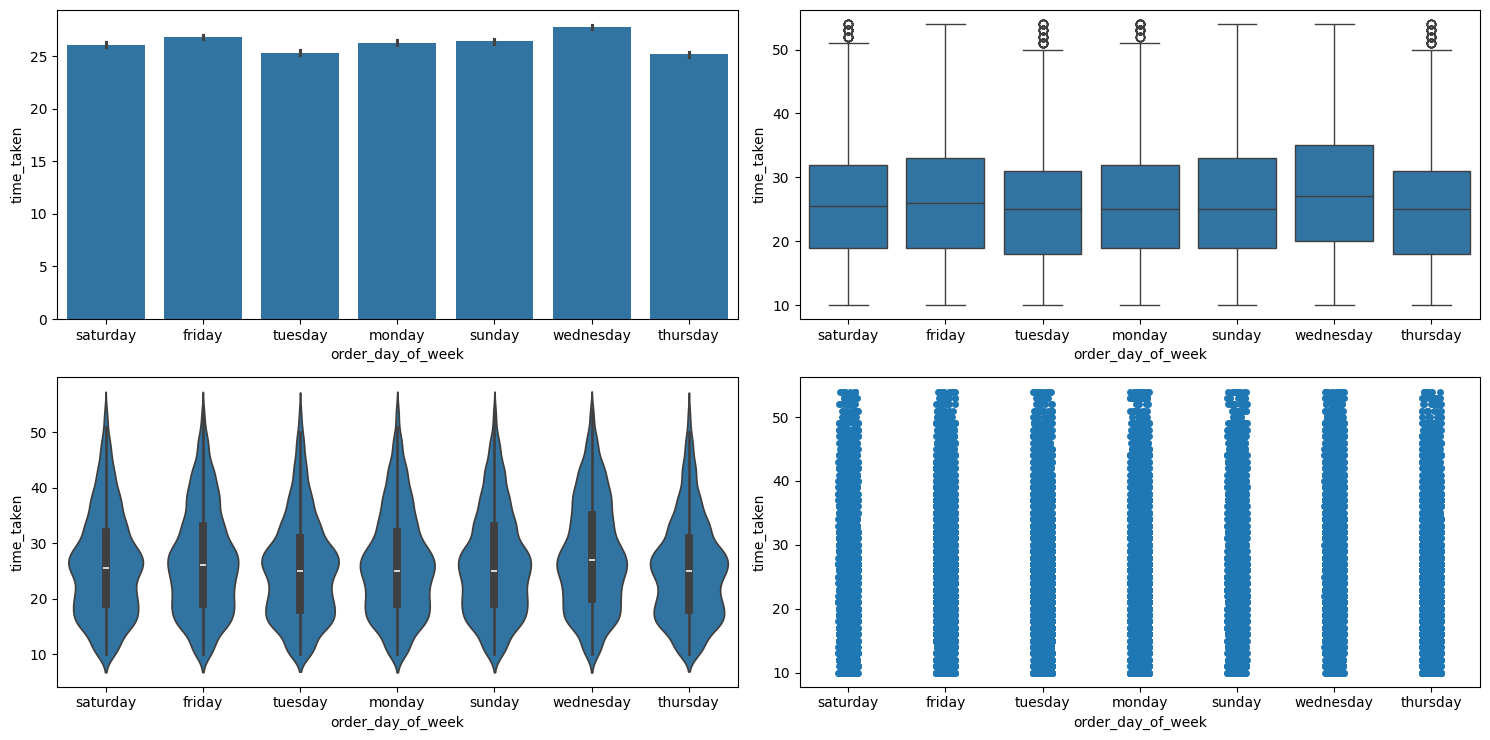

In [61]:
# analysis between day of week and target

numerical_categorical_analysis(df, "order_day_of_week", "time_taken")

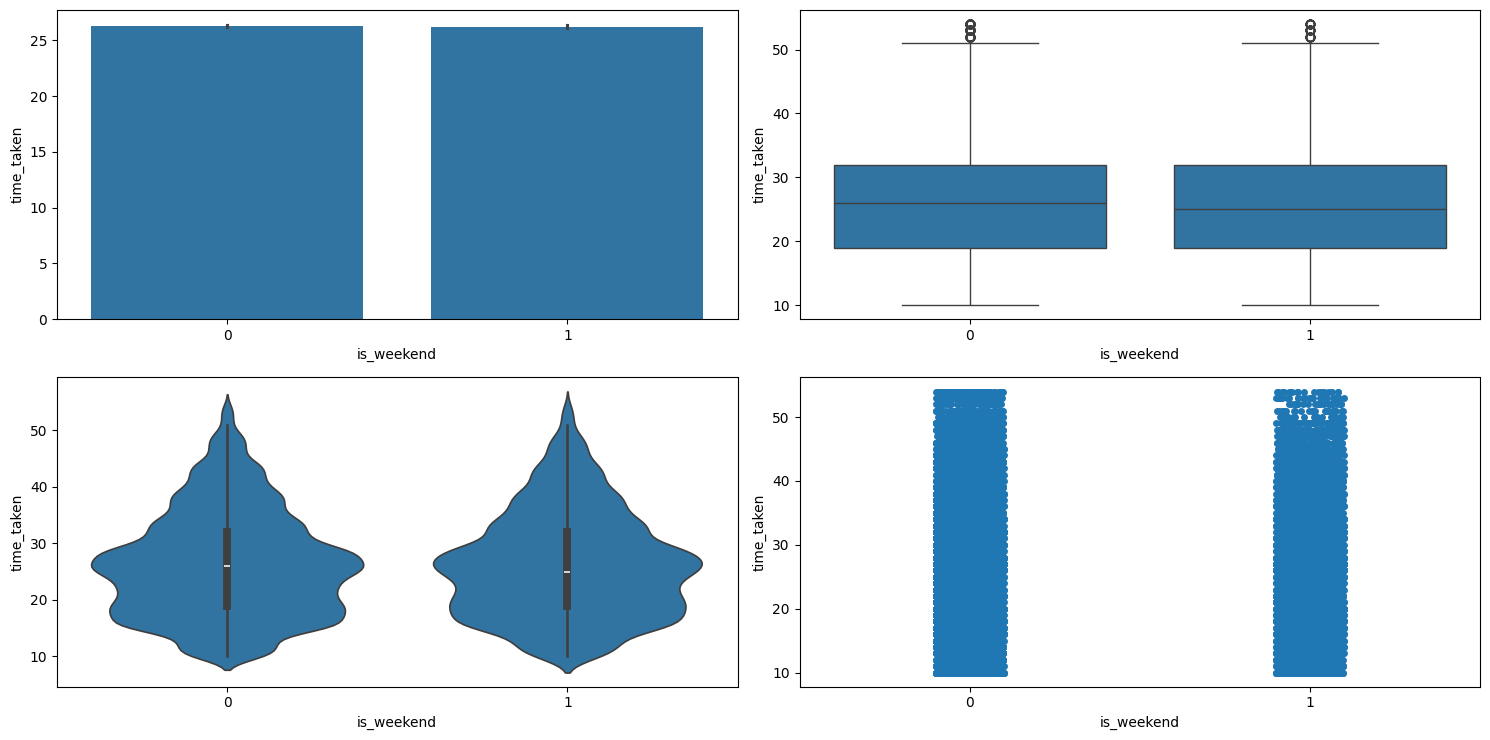

In [62]:
# does having a weekend affects target

numerical_categorical_analysis(df, "is_weekend", "time_taken")

In [63]:
# do weekends have an impact on traffic

chi_2_test(df, "is_weekend", "traffic")

0.6845961396354259
Fail to reject the null hypothesis. There is no significant association between is_weekend and traffic.


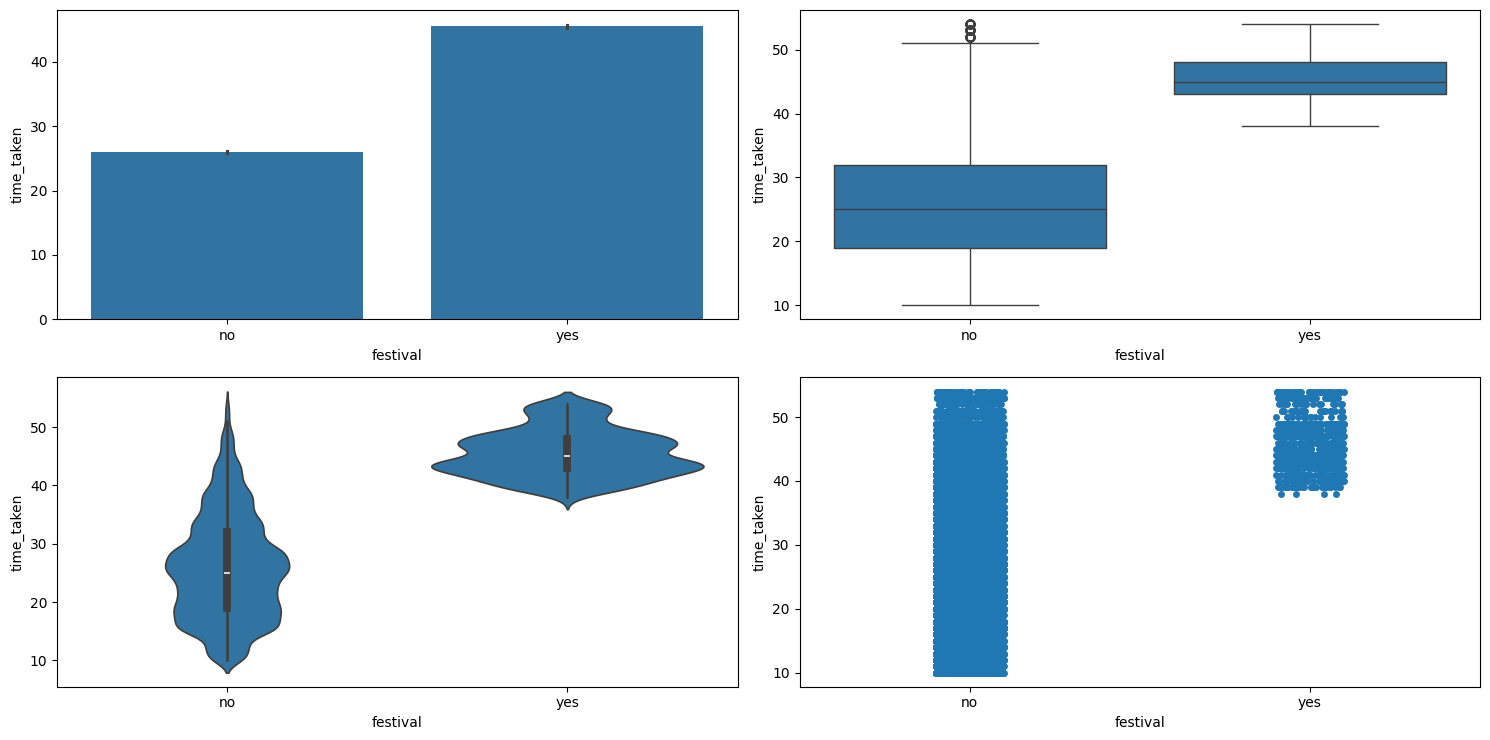

In [64]:
# festivals and target analysis

numerical_categorical_analysis(df, "festival", "time_taken")

In [65]:
df.pivot_table(index="traffic",columns="festival",values="time_taken",aggfunc="mean")

festival,no,yes
traffic,,
high,27.010373,45.826087
jam,30.538039,46.093651
low,21.284332,42.020000
medium,26.550288,43.715385


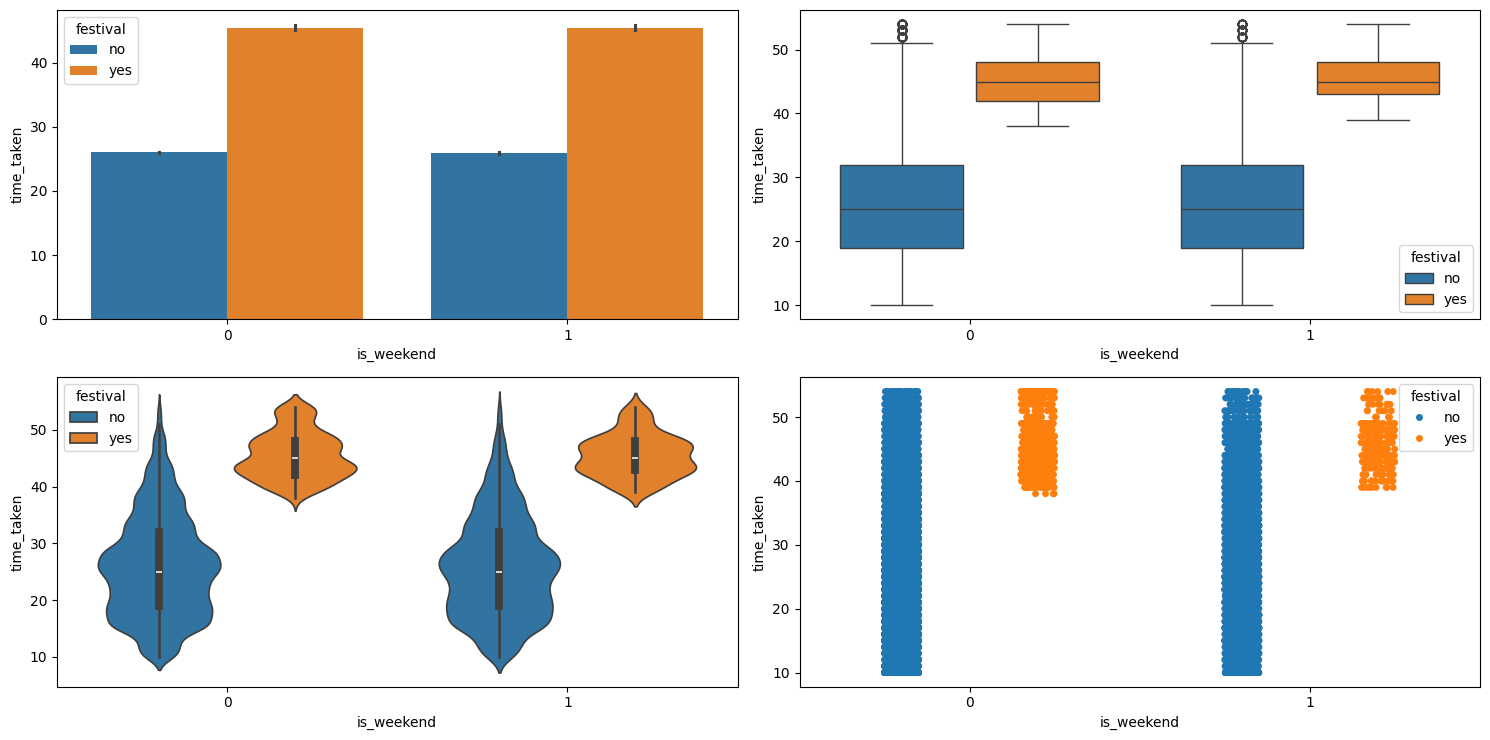

In [66]:
# does a weekend and a festival combined have an effect on delivery times

multivariate_analysis(df, "time_taken", "is_weekend", "festival")

## Order Time